In [2]:
import pandas as pd
import matplotlib.pyplot as plt
daily_data = pd.read_csv('daily_data.csv', parse_dates=['DATE'], na_values=['SOD', 'PRECIP', 'other_non_numeric_values'])

print("\nBasic Statistics:")
print(daily_data.describe())



Basic Statistics:
            STATION                           DATE  SOURCE  BackupElements  \
count  2.668000e+03                           2668  2668.0             0.0   
mean   7.251801e+10  2018-10-01 14:07:27.346326784     6.0             NaN   
min    7.251801e+10            2015-01-01 23:59:00     6.0             NaN   
25%    7.251801e+10            2016-11-29 17:59:00     6.0             NaN   
50%    7.251801e+10            2018-10-02 11:59:00     6.0             NaN   
75%    7.251801e+10            2020-08-03 05:59:00     6.0             NaN   
max    7.251801e+10            2022-05-31 23:59:00     6.0             NaN   
std    0.000000e+00                            NaN     0.0             NaN   

       BackupElevation  BackupLatitude  BackupLongitude  \
count           2668.0     2668.000000      2668.000000   
mean             260.0       42.689750       -73.828268   
min              260.0       42.681200       -73.831090   
25%              260.0       42.691800    

In [3]:
import pandas as pd

daily_data = pd.read_csv('daily_data.csv', parse_dates=['DATE'], na_values=['s', 'T', 'M'])
# Create a new column for the month
daily_data['Month'] = daily_data['DATE'].dt.month

# Calculate average temperature and precipitation per month
monthly_aggregations = daily_data.groupby('Month').agg({'DailyAverageDryBulbTemperature': 'mean', 'DailyPrecipitation': 'sum'})

# Display monthly aggregations
print("Monthly Aggregations:")
print(monthly_aggregations)

Monthly Aggregations:
       DailyAverageDryBulbTemperature  DailyPrecipitation
Month                                                    
1                           25.202429               18.36
2                           29.705584               19.94
3                           36.434959               18.76
4                           47.587500               27.35
5                           60.750000               20.62
6                           68.545455               26.96
7                           73.830986               35.11
8                           72.060185               29.82
9                           64.980952               28.02
10                          53.101852               30.46
11                          40.162679               19.91
12                          32.410138               21.28


In [4]:
average_daily_temperature = daily_data.groupby('DATE')['DailyAverageDryBulbTemperature'].mean()
print("Average Daily Temperature:")
print(average_daily_temperature)


Average Daily Temperature:
DATE
2015-01-01 23:59:00    25.0
2015-01-02 23:59:00    32.0
2015-01-03 23:59:00    27.0
2015-01-04 23:59:00    39.0
2015-01-05 23:59:00    27.0
                       ... 
2022-05-27 23:59:00    70.0
2022-05-28 23:59:00    68.0
2022-05-29 23:59:00    66.0
2022-05-30 23:59:00    72.0
2022-05-31 23:59:00    79.0
Name: DailyAverageDryBulbTemperature, Length: 2668, dtype: float64


In [5]:
# Identify days with extreme temperatures (e.g., above 90°F)
extreme_temperature_days = daily_data[daily_data['DailyMaximumDryBulbTemperature'] > 90]

# Display information about extreme temperature days
print("Extreme Temperature Days:")
print(extreme_temperature_days[['DATE', 'DailyMaximumDryBulbTemperature']])

Extreme Temperature Days:
                    DATE  DailyMaximumDryBulbTemperature
171  2015-07-19 23:59:00                            91.0
180  2015-07-28 23:59:00                            93.0
181  2015-07-29 23:59:00                            95.0
200  2015-08-18 23:59:00                            91.0
220  2015-09-07 23:59:00                            92.0
...                  ...                             ...
1986 2020-07-19 23:59:00                            93.0
1994 2020-07-27 23:59:00                            93.0
2331 2021-06-29 23:59:00                            92.0
2657 2022-05-21 23:59:00                            91.0
2667 2022-05-31 23:59:00                            92.0

[61 rows x 2 columns]


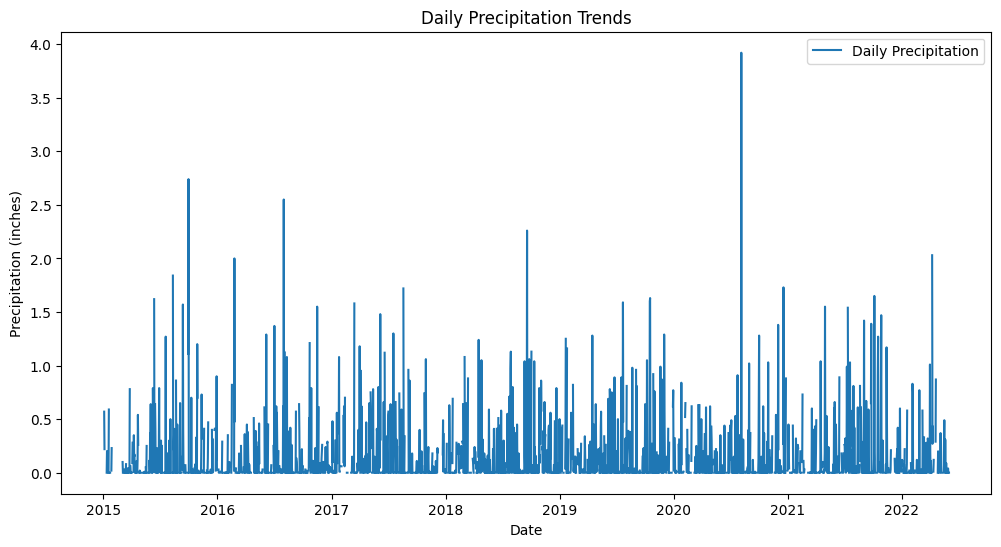

In [6]:
# Visualize precipitation over time
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['DailyPrecipitation'], label='Daily Precipitation')
plt.title('Daily Precipitation Trends')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.legend()
plt.show()


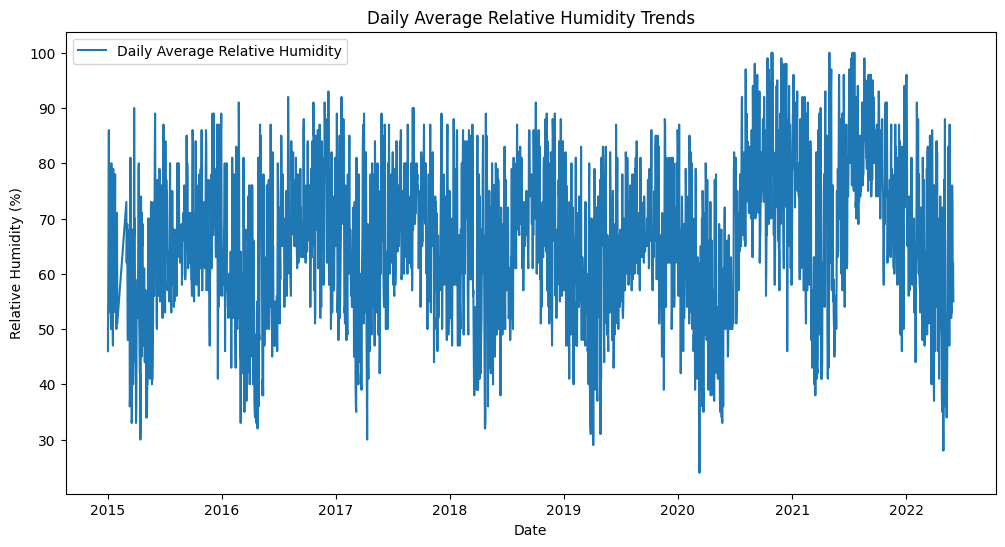

In [7]:

# Visualize humidity over time
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['DailyAverageRelativeHumidity'], label='Daily Average Relative Humidity')
plt.title('Daily Average Relative Humidity Trends')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()

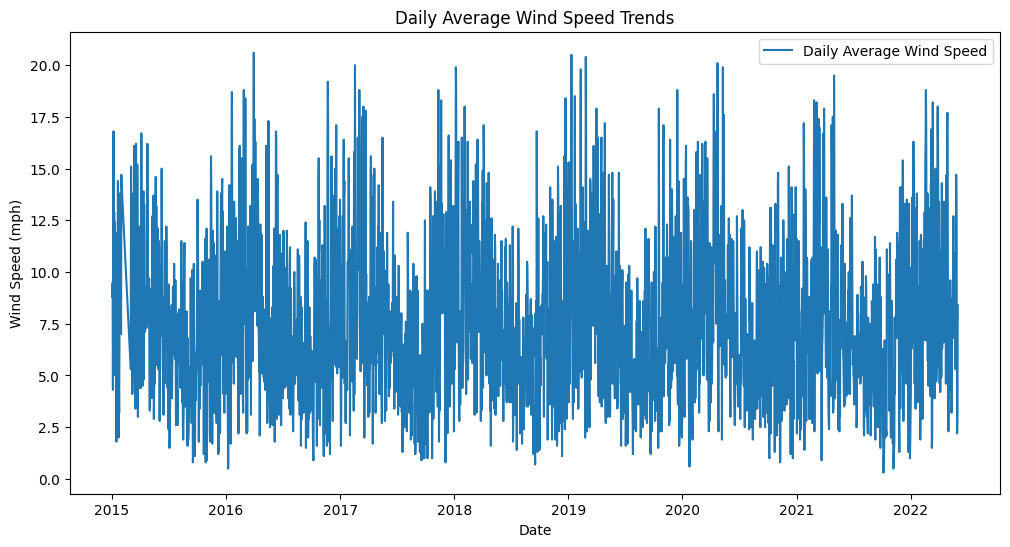

In [8]:
# Visualize wind speed over time
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['DailyAverageWindSpeed'], label='Daily Average Wind Speed')
plt.title('Daily Average Wind Speed Trends')
plt.xlabel('Date')
plt.ylabel('Wind Speed (mph)')
plt.legend()
plt.show()

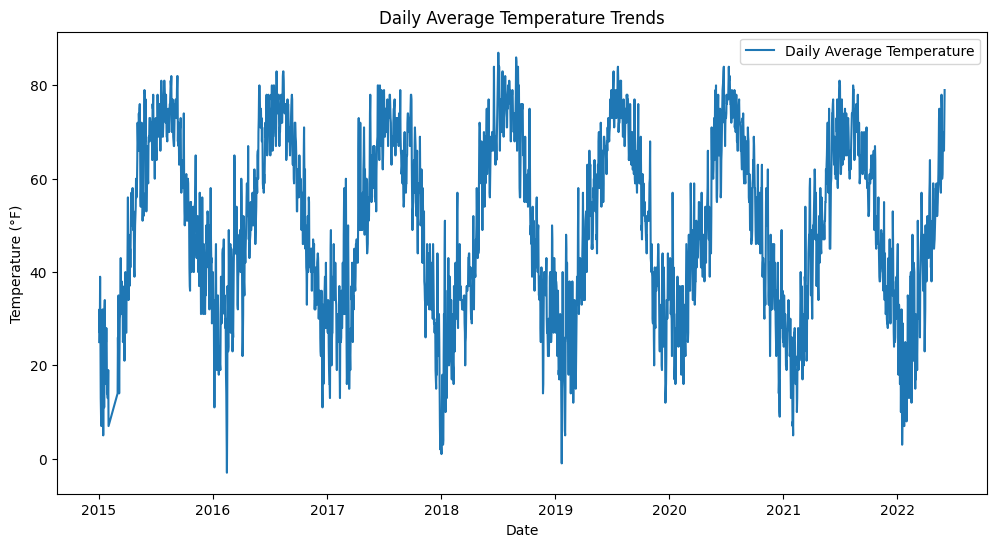

In [9]:

# Visualize trends over time
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['DailyAverageDryBulbTemperature'], label='Daily Average Temperature')
plt.title('Daily Average Temperature Trends')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()

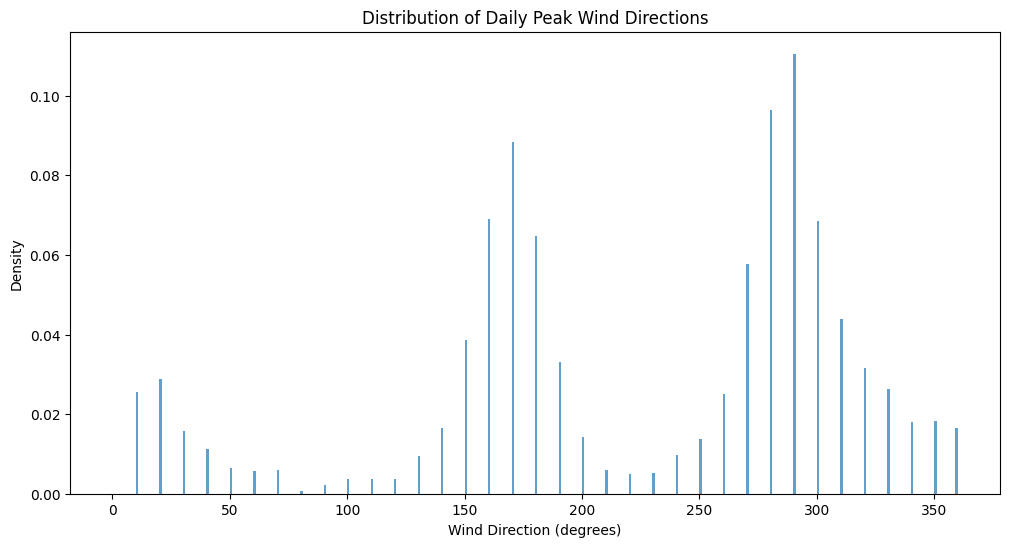

In [10]:
# Visualize distribution of wind directions
plt.figure(figsize=(12, 6))
plt.hist(daily_data['DailyPeakWindDirection'].dropna(), bins=360, range=(0, 360), density=True, alpha=0.7)
plt.title('Distribution of Daily Peak Wind Directions')
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('Density')
plt.show()


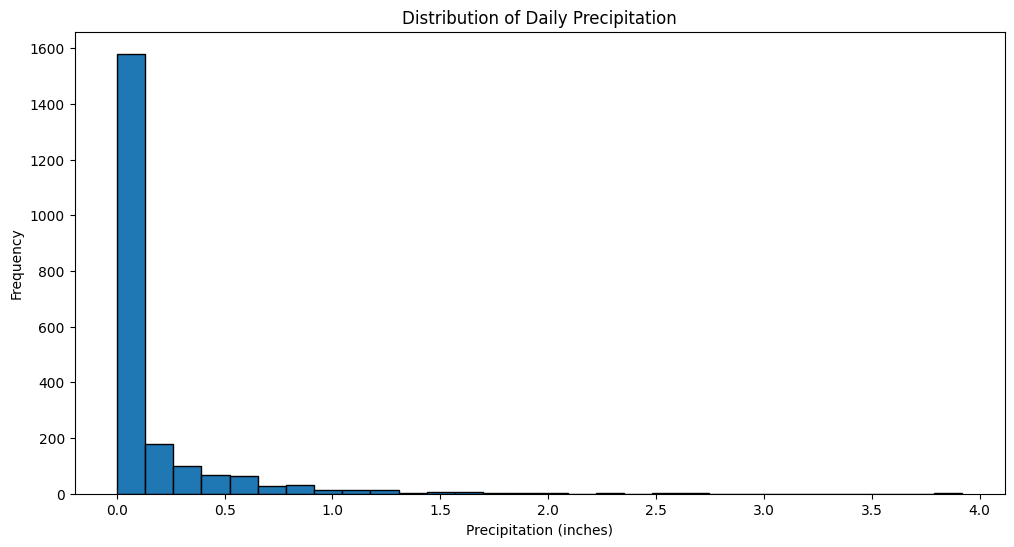

In [11]:
# Visualize the distribution of daily precipitation
plt.figure(figsize=(12, 6))
plt.hist(daily_data['DailyPrecipitation'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Daily Precipitation')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Frequency')
plt.show()


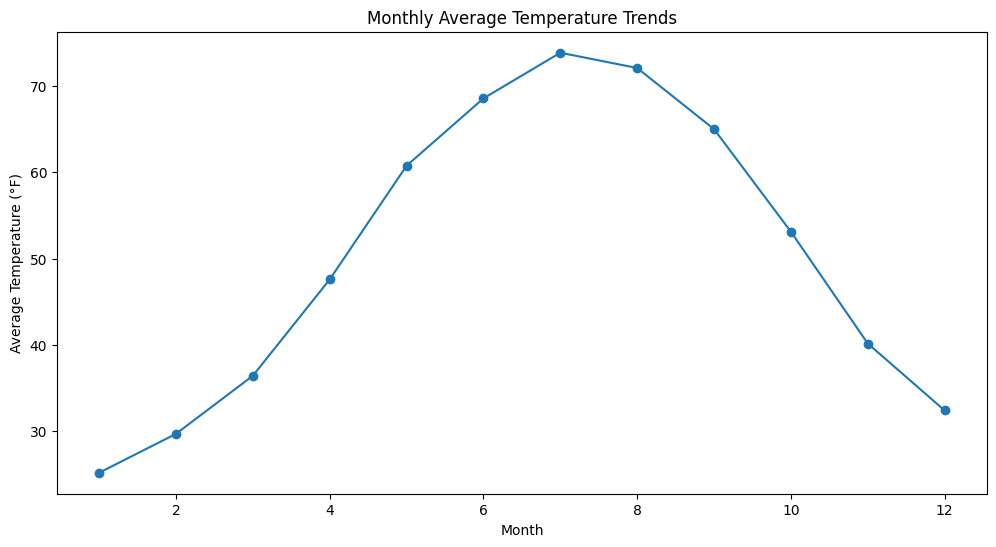

In [12]:
# Create a new column for the month
daily_data['Month'] = daily_data['DATE'].dt.month

# Calculate average temperature per month
monthly_temperature = daily_data.groupby('Month')['DailyAverageDryBulbTemperature'].mean()

# Visualize trends in monthly average temperature
plt.figure(figsize=(12, 6))
plt.plot(monthly_temperature.index, monthly_temperature.values, marker='o')
plt.title('Monthly Average Temperature Trends')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°F)')
plt.show()

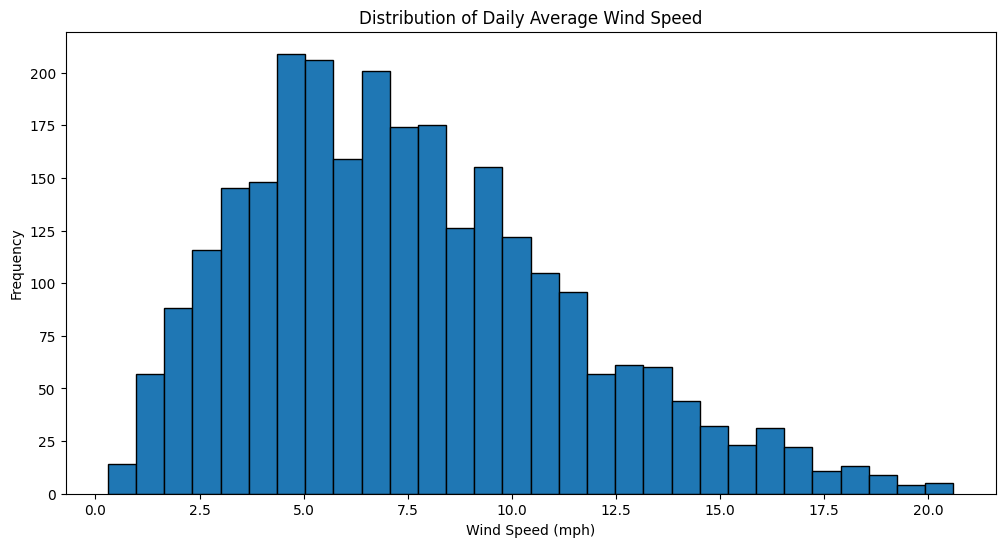

In [13]:
# Visualize the distribution of daily average wind speed
plt.figure(figsize=(12, 6))
plt.hist(daily_data['DailyAverageWindSpeed'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Daily Average Wind Speed')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Frequency')
plt.show()


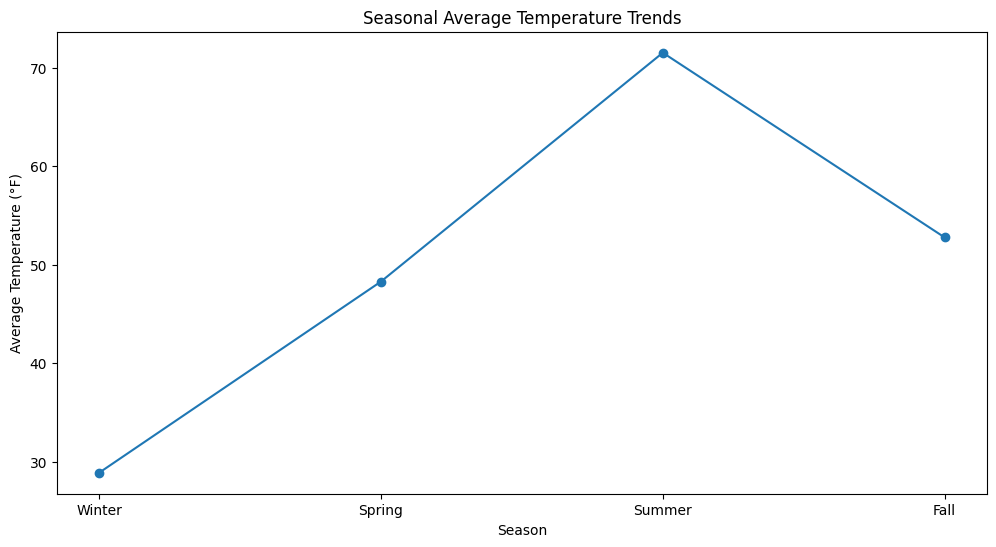

In [14]:
# Extract the season from the date (e.g., Winter, Spring, Summer, Fall)
daily_data['Season'] = (daily_data['DATE'].dt.month % 12 + 3) // 3

# Calculate average temperature per season
seasonal_temperature = daily_data.groupby('Season')['DailyAverageDryBulbTemperature'].mean()

# Visualize trends in seasonal average temperature
plt.figure(figsize=(12, 6))
plt.plot(seasonal_temperature.index, seasonal_temperature.values, marker='o')
plt.title('Seasonal Average Temperature Trends')
plt.xlabel('Season')
plt.ylabel('Average Temperature (°F)')
plt.xticks([1, 2, 3, 4], ['Winter', 'Spring', 'Summer', 'Fall'])
plt.show()


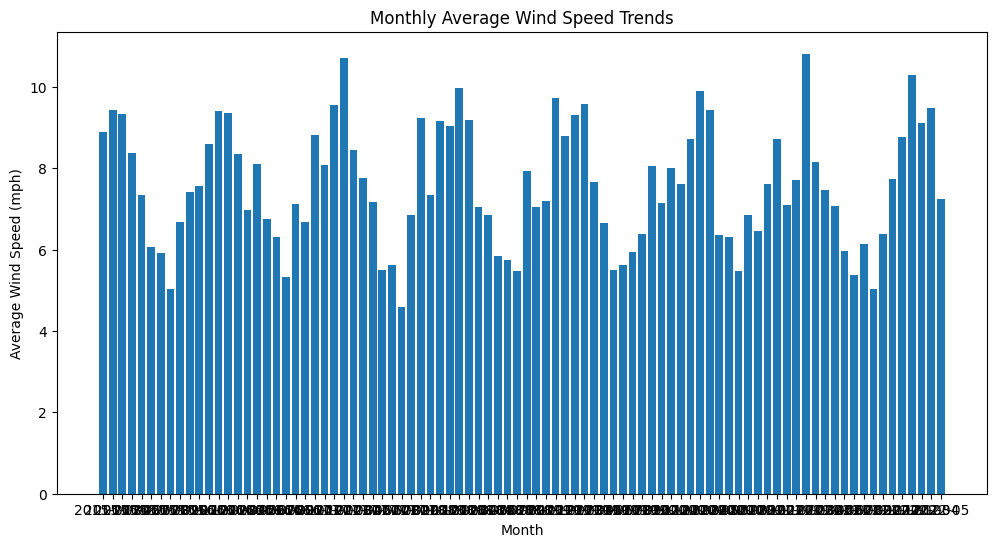

In [15]:
# Calculate average monthly wind speed
monthly_wind_speed = daily_data.groupby(daily_data['DATE'].dt.to_period("M"))['DailyAverageWindSpeed'].mean()

# Visualize trends in monthly average wind speed
plt.figure(figsize=(12, 6))
plt.bar(monthly_wind_speed.index.astype(str), monthly_wind_speed.values)
plt.title('Monthly Average Wind Speed Trends')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed (mph)')
plt.show()

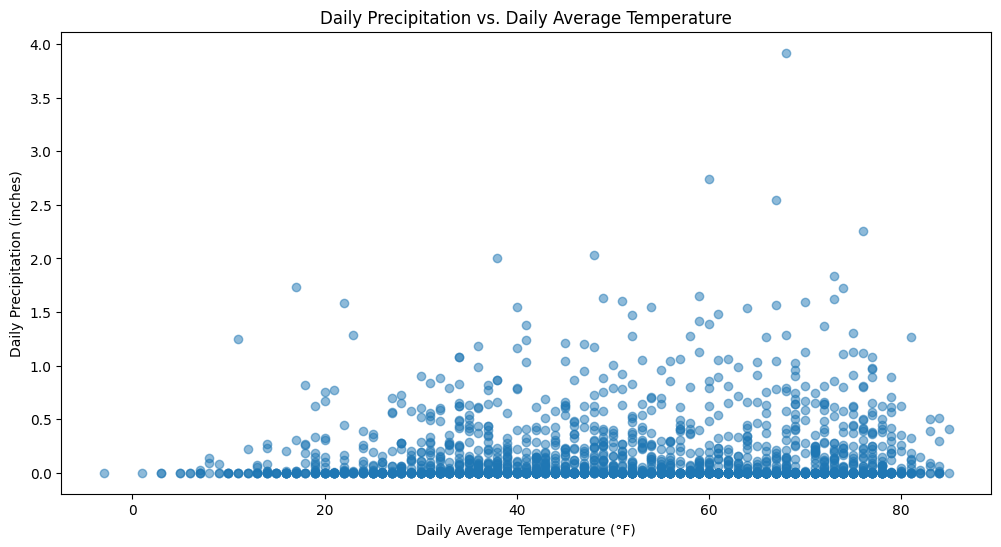

In [16]:
# Scatter plot of daily precipitation vs. daily average temperature
plt.figure(figsize=(12, 6))
plt.scatter(daily_data['DailyAverageDryBulbTemperature'], daily_data['DailyPrecipitation'], alpha=0.5)
plt.title('Daily Precipitation vs. Daily Average Temperature')
plt.xlabel('Daily Average Temperature (°F)')
plt.ylabel('Daily Precipitation (inches)')
plt.show()


In [17]:
import pandas as pd

# Load the datasets from Kaggle paths
daily_data = pd.read_csv('daily_data.csv', na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
hourly_data = pd.read_csv('hourly_data.csv', na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
monthly_data = pd.read_csv('monthly_data.csv', na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
three_hour_data = pd.read_csv('three_hour_data.csv', na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])

# Identify common columns among datasets
common_columns = set(daily_data.columns) & set(hourly_data.columns) & set(monthly_data.columns) & set(three_hour_data.columns)

# Print common columns
print("Common columns:", common_columns)


Common columns: {'BackupElements', 'BackupLongitude', 'BackupLatitude', 'REPORT_TYPE', 'DATE', 'WindEquipmentChangeDate', 'SOURCE', 'BackupName', 'BackupEquipment', 'STATION', 'BackupElevation'}


C:\Users\Anush Pranav\AppData\Local\Temp\ipykernel_100464\1340405060.py:5: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  hourly_data = pd.read_csv('hourly_data.csv', na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])


In [18]:
import pandas as pd
# Load the datasets from Kaggle paths
daily_data = pd.read_csv('daily_data.csv', parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
hourly_data = pd.read_csv('hourly_data.csv', parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
monthly_data = pd.read_csv('monthly_data.csv', parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
three_hour_data = pd.read_csv('three_hour_data.csv', parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
# Merge the datasets based on 'DATE' with different suffixes
merged_data = pd.merge(daily_data, hourly_data, on='DATE', how='outer', suffixes=('_daily', '_hourly'))
merged_data = pd.merge(merged_data, monthly_data, on='DATE', how='outer', suffixes=('_merged', '_monthly'))
merged_data = pd.merge(merged_data, three_hour_data, on='DATE', how='outer', suffixes=('_merged', '_three_hour'))
# Display the merged dataset
print("Merged Dataset:")
print(merged_data.head())
# Identify columns with mixed types in hourly_data
mixed_type_columns = hourly_data.iloc[:, [11, 12]].columns
print("Columns with mixed types in hourly_data:", mixed_type_columns)
# Print data types of those columns
print("Data types of columns with mixed types:")
print(hourly_data[mixed_type_columns].dtypes)

C:\Users\Anush Pranav\AppData\Local\Temp\ipykernel_100464\3026182378.py:4: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  hourly_data = pd.read_csv('hourly_data.csv', parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])


Merged Dataset:
   STATION_daily                DATE  REPORT_TYPE_daily  SOURCE_daily  \
0            NaN 2015-01-01 00:51:00                NaN           NaN   
1            NaN 2015-01-01 01:00:00                NaN           NaN   
2            NaN 2015-01-01 01:51:00                NaN           NaN   
3            NaN 2015-01-01 02:51:00                NaN           NaN   
4            NaN 2015-01-01 03:51:00                NaN           NaN   

   BackupElements_daily  BackupElevation_daily BackupEquipment_daily  \
0                   NaN                    NaN                   NaN   
1                   NaN                    NaN                   NaN   
2                   NaN                    NaN                   NaN   
3                   NaN                    NaN                   NaN   
4                   NaN                    NaN                   NaN   

   BackupLatitude_daily  BackupLongitude_daily BackupName_daily  ...  \
0                   NaN                 

> Datatypes of Columns..

In [19]:
# Identify columns with mixed types in hourly_data
mixed_type_columns = hourly_data.iloc[:, [11, 12]].columns
print("Columns with mixed types in hourly_data:", mixed_type_columns)

# Print data types of those columns
print("Data types of columns with mixed types:")
print(hourly_data[mixed_type_columns].dtypes)


Columns with mixed types in hourly_data: Index(['HourlyDewPointTemperature', 'HourlyDryBulbTemperature'], dtype='object')
Data types of columns with mixed types:
HourlyDewPointTemperature    object
HourlyDryBulbTemperature     object
dtype: object


In [20]:
# Check for missing values
missing_values = merged_data.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
STATION_daily                          85575
DATE                                       0
REPORT_TYPE_daily                      88243
SOURCE_daily                           85575
BackupElements_daily                   88243
                                       ...  
HourlyVisibility_three_hour            67400
HourlyWetBulbTemperature_three_hour    67400
HourlyWindDirection_three_hour         67400
HourlyWindSpeed_three_hour             67400
WindEquipmentChangeDate_three_hour     67400
Length: 119, dtype: int64


In [21]:
# Summary statistics
summary_stats = merged_data.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       STATION_daily                           DATE  REPORT_TYPE_daily  \
count   2.668000e+03                          88243                0.0   
mean    7.251801e+10  2018-09-16 09:13:44.744851968                NaN   
min     7.251801e+10            2015-01-01 00:51:00                NaN   
25%     7.251801e+10            2016-11-08 03:21:00                NaN   
50%     7.251801e+10            2018-09-15 22:00:00                NaN   
75%     7.251801e+10            2020-07-25 02:21:00                NaN   
max     7.251801e+10            2022-05-31 23:59:00                NaN   
std     0.000000e+00                            NaN                NaN   

       SOURCE_daily  BackupElements_daily  BackupElevation_daily  \
count        2668.0                   0.0                 2668.0   
mean            6.0                   NaN                  260.0   
min             6.0                   NaN                  260.0   
25%             6.0                   NaN

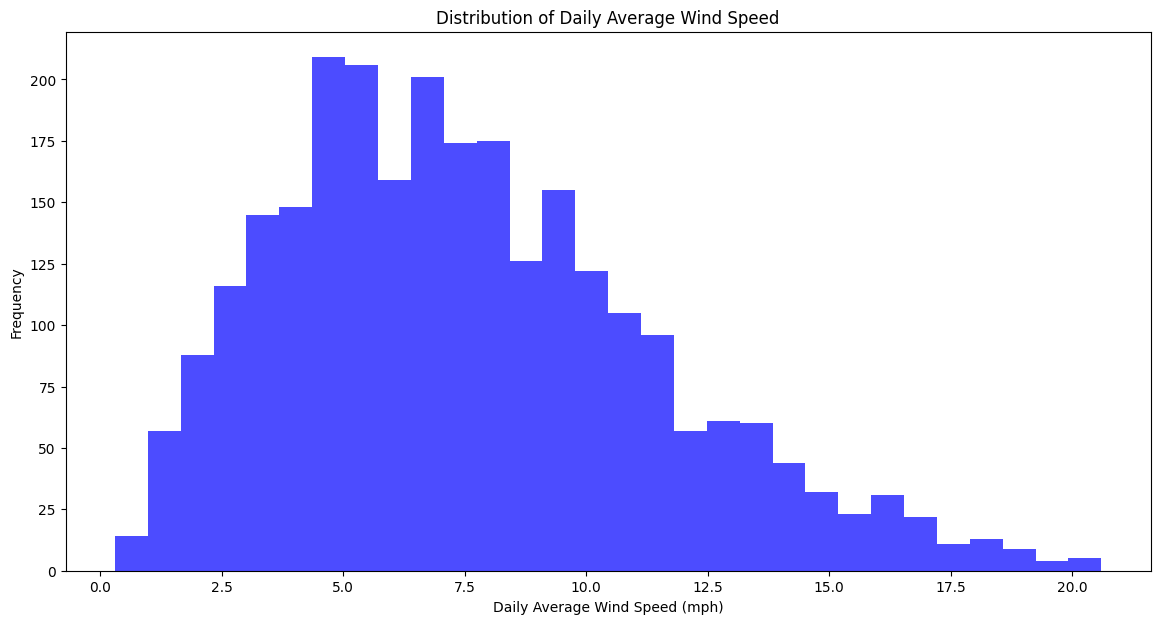

In [31]:
# Analyze and visualize the distribution of wind speed
plt.figure(figsize=(14, 7))
plt.hist(merged_data['DailyAverageWindSpeed'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Daily Average Wind Speed (mph)')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Average Wind Speed')
plt.show()



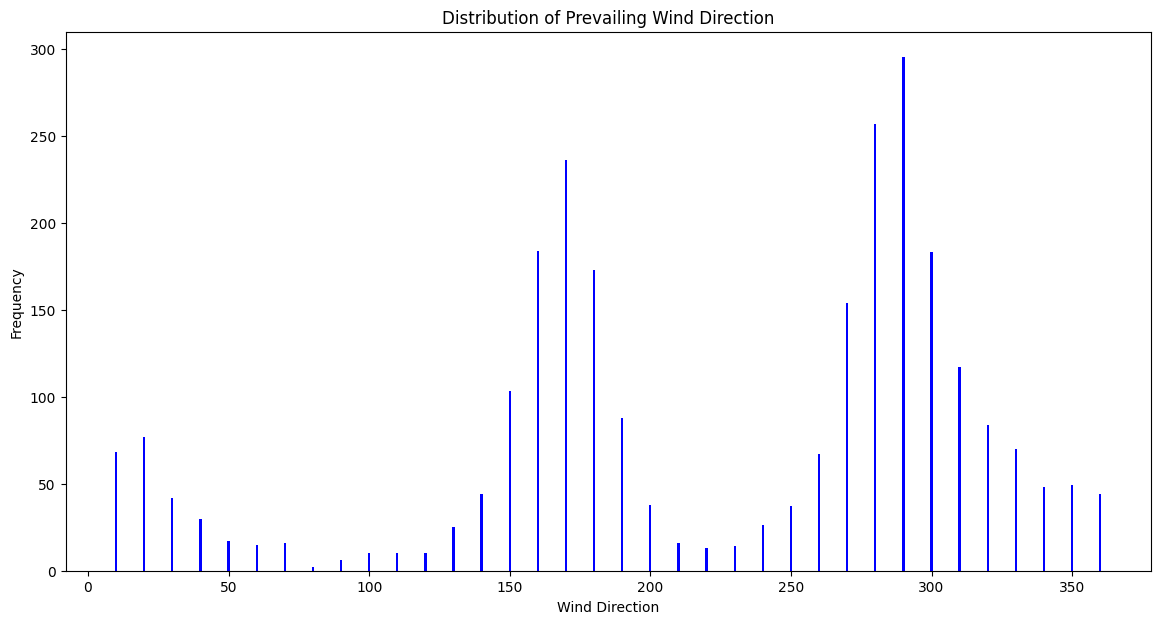

In [27]:
# Identify and visualize the prevailing wind direction
plt.figure(figsize=(14, 7))
plt.bar(merged_data['DailyPeakWindDirection'].value_counts().index, merged_data['DailyPeakWindDirection'].value_counts().values, color='blue')
plt.xlabel('Wind Direction')
plt.ylabel('Frequency')
plt.title('Distribution of Prevailing Wind Direction')
plt.show()


In [24]:
# Unique values in the 'REPORT_TYPE' column for each dataset
unique_conditions_daily = daily_data['REPORT_TYPE'].unique()
unique_conditions_hourly = hourly_data['REPORT_TYPE'].unique()
unique_conditions_three_hour = three_hour_data['REPORT_TYPE'].unique()

# Combine unique conditions from all datasets
all_unique_conditions = set(unique_conditions_daily) | set(unique_conditions_hourly) | set(unique_conditions_three_hour)

# Print the unique weather conditions
print("Unique Weather Conditions:")
for condition in all_unique_conditions:
    print(condition)


Unique Weather Conditions:
FM-15
nan
FM-12


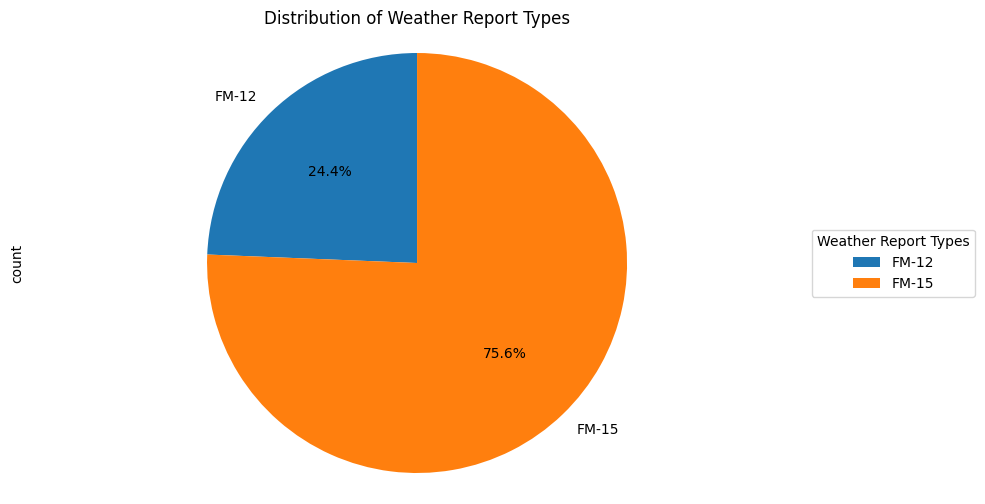

In [25]:
import matplotlib.pyplot as plt

# Assuming daily_data, hourly_data, and three_hour_data are your DataFrames
# Replace 'REPORT_TYPE' with the actual column name in your datasets
report_types_daily = daily_data['REPORT_TYPE'].value_counts()
report_types_hourly = hourly_data['REPORT_TYPE'].value_counts()
report_types_three_hour = three_hour_data['REPORT_TYPE'].value_counts()

# Combine counts from all datasets
combined_report_types = report_types_daily.add(report_types_hourly, fill_value=0)
combined_report_types = combined_report_types.add(report_types_three_hour, fill_value=0)

# Plot the pie chart with previous colors
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10.colors  # Using tab10 colormap for consistent colors
combined_report_types.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)

# Add a legend
plt.legend(combined_report_types.index, title='Weather Report Types', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Distribution of Weather Report Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
